** Regresión lineal con datos categóricos: Costos, Localidades y Salarios**

📌 Objetivos de la Práctica:
Al finalizar esta práctica, los estudiantes serán capaces de:

- Codificar variables categóricas usando one-hot encoding con K-1 para problemas de regresión
- Realizar AED
- Construir un modelo de regresión con variables dummy
- Interpretar los resultados de los coeficientes
- Analizar los resultados de los errores residuales
- Calcular el desempeño del modelo de regresión.

Problema: Se podría argumentar que el salario está relacionado con el costo de la educación. Por lo tanto, para analizar este argumentos veremos qué sucede cuando usamos las variables independientes cost y location.

# 1. Carga de datos

Carga el conjunto de datos college.csv, que está en campus virtual, en un dataframe. Elige de este conjunto las columnas salary (variable dependiente), cost(variable independiente - numérica) y location (variable independiente categórica).

Realiza lo siguiente:

*   Convierte si es necesario la variable location a tipo de dato categórico
*   Usa la instrucción describe() en las variables salary y cost
* Cuenta la cantidad de datos que hay por categoría en location
* Convierte la variable location usando one-hot encoding



In [1]:
from google.colab import drive
drive.mount('/content/drive')
def separador():
    print("\n" + "=" * 170 + "\n")
def header(Titulo):
  por=((170-len(Titulo))//10)
  a=int(1.2*por)
  print("."*a+"·"*a+"~"*a+"≈"*a+"≋"
  *int(por*.2),Titulo,"≋"*int(por*.2)
  +"≈"*a+"~"*a+"·"*a+"."*a,"\n\n")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
header('1. Carga de Datos')
df=pd.read_csv("/content/drive/MyDrive/Unidad03/college.csv", usecols=["salary","cost","location"])
#print(df.head())
df['location']=df['location'].astype('category')
#print(df.dtypes);separador()
print(f"Descripción de la columna salary:\n{df['salary'].describe()}\n\nDescripción de la columna cost:\n{df['cost'].describe()}");separador()
print(f"La cantidad de datos en la columna location es: \n{df['location'].value_counts()}");separador()
encoder=OneHotEncoder(sparse_output=False, drop='first')
encoded_loc=encoder.fit_transform(df[['location']])
encoded_df=pd.DataFrame(encoded_loc, columns=encoder.get_feature_names_out(['location']))
df=pd.concat([df, encoded_df], axis=1)
#copia del df con location:
df_original=df.copy()
df.drop('location', axis=1, inplace=True)
print(f'Primeras lineas del nuevo dataset:\n{df.head()}')





..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ 1. Carga de Datos ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


Descripción de la columna salary:
count        85.000000
mean      95898.823529
std       11937.121912
min       74900.000000
25%       87100.000000
50%       93200.000000
75%      105000.000000
max      123000.000000
Name: salary, dtype: float64

Descripción de la columna cost:
count        85.000000
mean     142434.470588
std       53913.064578
min       18260.000000
25%       84670.000000
50%      169200.000000
75%      188700.000000
max      227300.000000
Name: cost, dtype: float64


La cantidad de datos en la columna location es: 
location
NE    25
W     21
S     20
MW    19
Name: count, dtype: int64


Primeras lineas del nuevo dataset:
   salary    cost  location_NE  location_S  location_W
0  119000  189300          1.0         0.0         0.0
1  121000  189600          1.0         0.0         0.0
2  123000  1

# 2. Análisis Exploratorio de los Datos

Realiza un análisis exploratorio de los datos y discute lo que observas en cada gráfica.


*   Crea un histograma de la columna salary. Discute lo que observas
* Crea un diagrama de dispersión de salary vs cost, considerando lo siguiente: para cada punto elegirás un color que represente la localidad en la que está el salario y el costo de la educación. Por lo tanto el diagrama de dispersión debería tener puntos en 4 colores distintos. Discute lo que observas
* Emplea un boxplot para saber si hay diferencias en los costos según la ubicación, es decir, con boxplot deberás analizar la distribución de cost por localidad. Discute lo que observas




...............···············~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 2. Análisis Exploratorio de los Datos ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~···············............... 




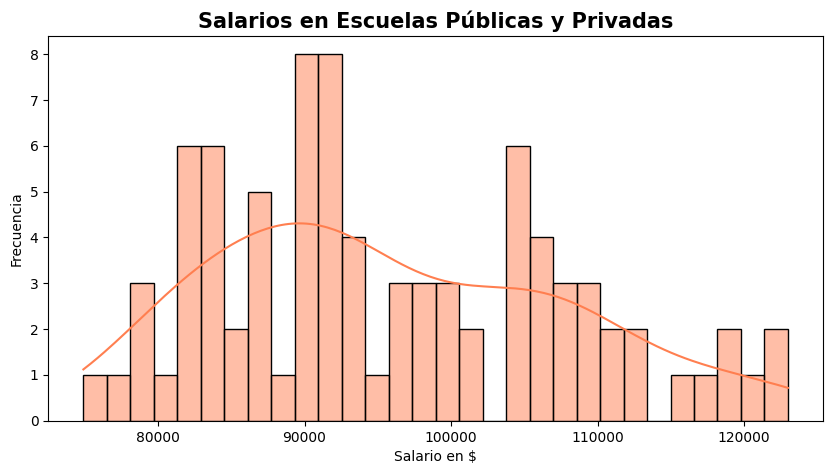

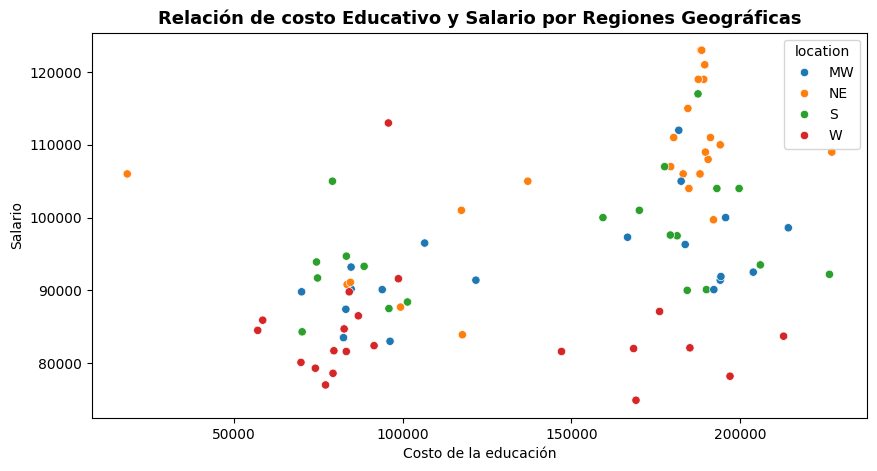

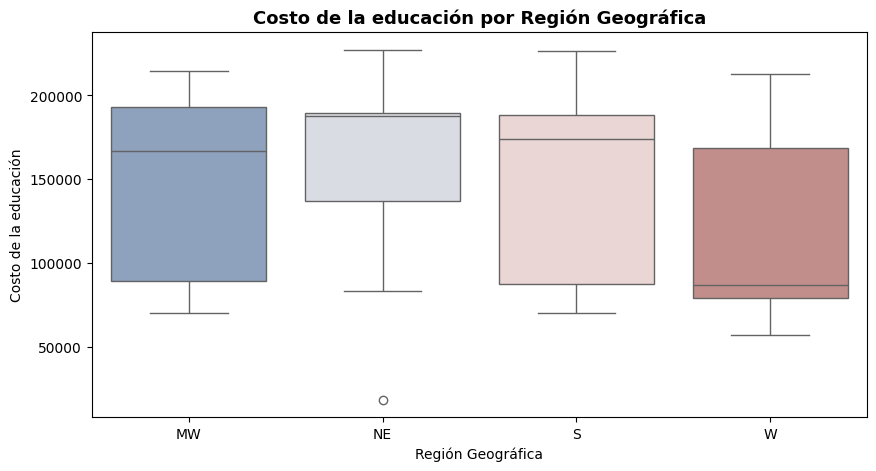

In [3]:
header('2. Análisis Exploratorio de los Datos')
plt.figure(figsize=(10,5))
sns.histplot(df['salary'], bins=30, kde=True, color='coral')
plt.xlabel('Salario en $')
plt.ylabel('Frecuencia')
plt.title('Salarios en Escuelas Públicas y Privadas', size=15, fontweight='bold')
plt.show();separador()
plt.figure(figsize=(10,5))
sns.scatterplot(x='cost', y='salary', hue='location' , data=df_original)
plt.xlabel('Costo de la educación')
plt.ylabel('Salario')
plt.title('Relación de costo Educativo y Salario por Regiones Geográficas', size=13, fontweight='bold')
plt.show();separador()
plt.figure(figsize=(10,5))
sns.boxplot(x='location', y='cost', data=df_original, palette='vlag', hue='location')
plt.xlabel('Región Geográfica')
plt.ylabel('Costo de la educación')
plt.title('Costo de la educación por Región Geográfica', size=13, fontweight='bold')
plt.show();separador()


Según las graficas, la mayoría de los docentes de escuelas publicas y privadas, tienen salarios que superan un poco los 90,000. En promedio, los docentes son mejor pagados en el noreste, en donde el costo de la educación es mayor y peor pagados en el oeste en donde el costo de la educación es menor.

# 3. Construcción del modelo de regresión

- Construye el modelo de regresión usando los datos de salario, costo y location. Recuerda que esta última debe ser en su versión codificada con one-hot encoding.
- Imprime los coeficientes e interpreta qué significan cuando se sustituyen valores en costo, y location (versión codificada). Si no recuerdas cómo se hace esta interpretación consulta los videos.


In [4]:
header('3. Construcción del modelo de regresión')
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()
X=df[['cost','location_NE',  'location_S' , 'location_W']]
y=df['salary']
modelo.fit(X,y)
print(f'El intercepto del modelo es: {modelo.intercept_:.4f}')
coef=pd.DataFrame({'Variable':X.columns, 'Coeficiente':modelo.coef_})
print(f'\n{coef}')



...............···············~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 3. Construcción del modelo de regresión ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~···············............... 


El intercepto del modelo es: 84988.7162

      Variable   Coeficiente
0         cost      0.060518
1  location_NE  12032.819692
2   location_S   2800.345026
3   location_W  -7721.420103


**Interpretación del intercepto y coeficiente del modelo:**

**El intercepto** representa el valor de la variable dependiente para el grupo de de referencia a la variable codificada (location) que se eliminó cuando se aplico drop='first', en el one hot encoding.

**Coeficiente 'cost'**. La cifra significa que si las demás variables se mantienen constantes, por cada unidad que se incrementa el costo, el salario aumenta .060518 unidades.

**Los otros 3 coeficientes** indican la diferencia que tienen con respecto al grupo de referencia. (En este caso location_E).
  * En location_NE el salario es aprox 12032 unidades mayor que en Location_E
  * En Location_S es aprox 2800 unidades mayor que Location_E
  * En Location_W es aprox 7721 unidades menor que Location_E.

# 4. Análisis de Residuos

- Construyen una visualización de predicciones (salario estimado) vs valores reales (salario real).
- Crea una gráfica de los errores residuales. Discute lo que observas

................················~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 4. Analisis de Residuos ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~················................ 




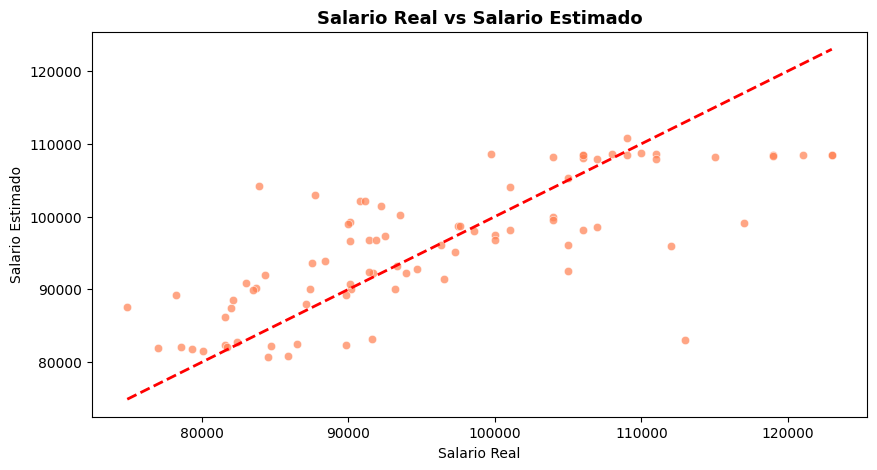

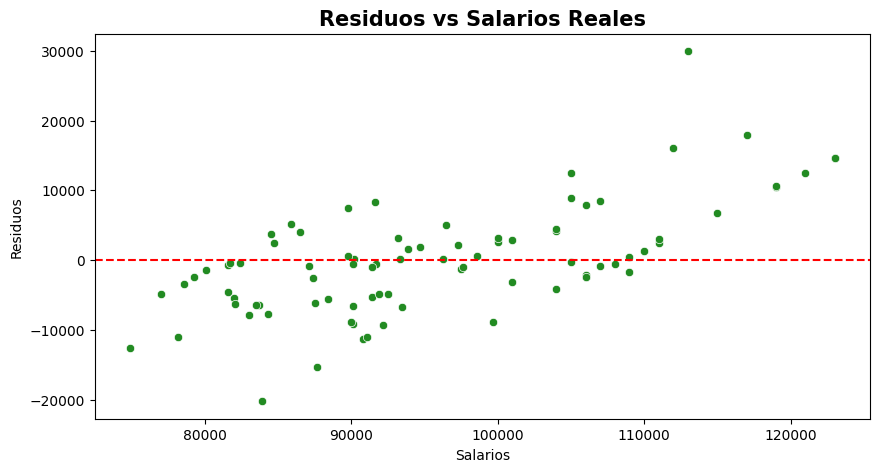

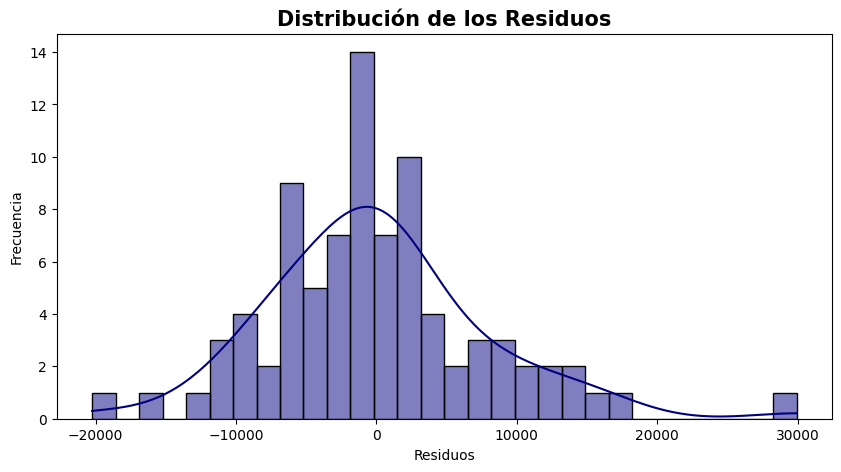

<Figure size 1000x500 with 0 Axes>

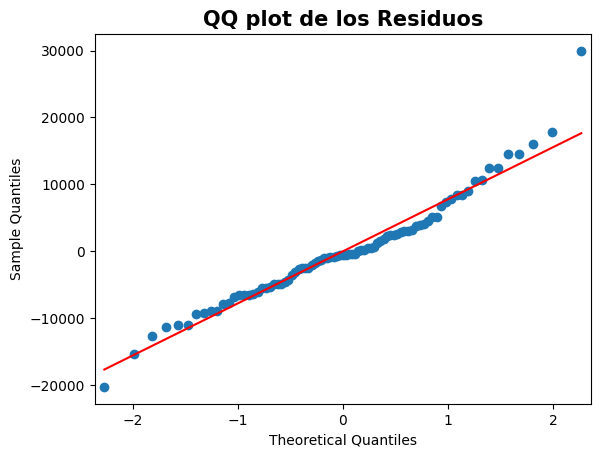



Prueba de normalidad Shapiro-Wilk
Estadístico de prueba: 0.9644
Valor p: 0.0190
Los residuos NO se distribuyen normalmente. El resultado es menor de .5 y se rechaza la hopotesis nula


In [5]:
header('4. Analisis de Residuos')
y_pred=modelo.predict(X)
plt.figure(figsize=(10,5))
sns.scatterplot(x=y, y=y_pred, color='coral', alpha=.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Salario Real')
plt.ylabel('Salario Estimado')
plt.title('Salario Real vs Salario Estimado', size=13, fontweight='bold')
plt.show();separador()

residuos=y-y_pred
plt.figure(figsize=(10,5))
sns.scatterplot(x=y, y=residuos, color='forestgreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Salarios')
plt.ylabel('Residuos')
plt.title('Residuos vs Salarios Reales', size=15, fontweight='bold')
plt.show();separador()
plt.figure(figsize=(10,5))
sns.histplot(residuos, kde=True, color='navy', bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos', size=15, fontweight='bold')
plt.show();separador()
import statsmodels.api as sm
plt.figure(figsize=(10,5))
sm.qqplot	(residuos, line='s')
plt.title('QQ plot de los Residuos', size=15, fontweight='bold')
plt.show();separador()
from scipy import stats
shapiro_stat, shapiro_p=stats.shapiro (residuos)
print('Prueba de normalidad Shapiro-Wilk')
print(f'Estadístico de prueba: {shapiro_stat:.4f}')
print(f'Valor p: {shapiro_p:.4f}')
if shapiro_p>.05:
  print('hay normalidad en la distribución de los residuos')
else:
  print('Los residuos NO se distribuyen normalmente. El resultado es menor de .5 y se rechaza la hopotesis nula')

Según la grafica de residuos vs salarios reales, se observa que tienen una relación creciente proporcional, en los salarios mas altos se dispersa un poco mas, lo que podría indicat heterocedasticidad. El modelo no logra capturar todo, definitivamente es necesario mejorarlo con alguna transformación.

# 5. Evalúa el modelo

- Calcula el MSE del modelo construido. Recuerda que usas el propio conjunto de datos (No hablamos nada de entrenamiento y test).
- Calcula el R² Score

Discute estos resultados obtenidos.

In [13]:
header('5. Evalúa el modelo')
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y, y_pred)#Ahora si tomo el database completo, sin separarlo
print(f'El MSE del modelo es: {mse:.4f}')
print(f'El RMSE del modelo es: {np.sqrt(mse):.4f}')
r2=r2_score(y,y_pred)#database completo
print(f'El R² Score del modelo es: {r2:.4f}')
print('''El resultado de R² score quiere decir que el modelo explica la variabilidad de los datos en un 57%
aproximadamente, lo que no es bueno, podría ser mas alto. Por otro lado, el MSE es una cifra cuadrática,
y representa el cuadrado del error entre los valores predichos y reales, como estamos hablando de cifras grandes
el MSE va a ser altísimo, mejor utilizo RMSE (raíz cuadrada de MSE) porque considero que son cifras mas convenientes.
El resultado de RMSE es 7776.9 unidades, lo que significa que  el error promedio podría mejorar mucho''')



..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ 5. Evalúa el modelo ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


El MSE del modelo es: 60480269.1466
El RMSE del modelo es: 7776.9061
El R² Score del modelo es: 0.5705
El resultado de R² score quiere decir que el modelo explica la variabilidad de los datos en un 57%
aproximadamente, lo que no es bueno, podría ser mas alto. Por otro lado, el MSE es una cifra cuadrática,
y representa el cuadrado del error entre los valores predichos y reales, como estamos hablando de cifras grandes
el MSE va a ser altísimo, mejor utilizo RMSE (raíz cuadrada de MSE) porque considero que son cifras mas convenientes.
El resultado de RMSE es 7776.9 unidades, lo que significa que  el error promedio podría mejorar mucho


# 6. Realiza un análisis de varianza con stastmodel

Consulta esto aquí https://www.statsmodels.org/dev/examples/notebooks/generated/variance_components.html

In [10]:
header('6. Realiza un analisis de varianza con statsmodel')
#Segun la información que se nos proporcionó por medio del enlace, primero hago un analisis cruzado.
import statsmodels.api as sm
modelo_mixto=sm.MixedLM.from_formula('salary~cost+location', data=df_original, groups=df_original['location']).fit()
print(modelo_mixto.summary())
var_grupal=modelo_mixto.cov_re.iloc[0,0]
var_residual=modelo_mixto.scale
print(f'La varianza entre las regiones de location es: {var_grupal:.4f}')
print(f'La varianza  dentro de las regiones de location es: {var_residual:.4f}')

..............··············~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 6. Realiza un analisis de varianza con statsmodel ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~··············.............. 


                     Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       salary       
No. Observations:         85            Method:                   REML         
No. Groups:               4             Scale:                    64260285.9682
Min. group size:          19            Log-Likelihood:           -851.8022    
Max. group size:          25            Converged:                Yes          
Mean group size:          21.2                                                 
-------------------------------------------------------------------------------
                  Coef.         Std.Err.       z    P>|z|   [0.025     0.975]  
-------------------------------------------------------------------------------
Intercept         84988.716         8592.136  9.89

In [11]:
header('varianza con efecto fijo')
#Hago los dos por si las dudas, no me quedó claro cual era necesario.
#en un principio había pensado que este, pero el enlace tiene otra información.
modelo=sm.OLS.from_formula('salary~cost+C(location)', data=df_original).fit()
print(modelo.summary())

................················~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ varianza con efecto fijo ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~················................ 


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     26.57
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           4.96e-14
Time:                        20:11:01   Log-Likelihood:                -882.12
No. Observations:                  85   AIC:                             1774.
Df Residuals:                      80   BIC:                             1786.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err         